In [1]:
import numpy as np 
import  matplotlib.pyplot as plt


# 신경망의 기초


신경망은 컴퓨터의 역사와 거의 동시에 시작되었다고 해도 과언이 아닐 정도로 오래된 학문이다. 하지만 오랜동안 단층신경망에 대한 연구가 중심을 이뤘고 단층신경망의 한계에 대한 지적(XOR 문제) 에 의해 한때 긴 침채기를 맞은 후에 다시 다층 신경망 오류 역전파 모델에 의해 그 한계를 극복하고 부활하였다. 본 자료에서는 신경망의 기초가 되는 가장 기초적인 수렴에 의한 문제해결방법을 고찰해 보고, 역전파모델의 기초가 되는 경사하강법에 대해 학습해본다. 
*이탤릭체 텍스트*



##  수렴에 의한 단순 회귀분석


### 데이터 만들기

먼저 x * 2 = y 에 오차가 포함된 데이터를 상정해보자.  이때 1부터 10까지의 랜덤한 가중치를 알아내야 한다고 가정해보자.  x 는 0부터 1까지의 값을 20개로 나누고 오차값은 0을 중심으로 0.1 의 표준편차이 랜덤치로 생성한다. 



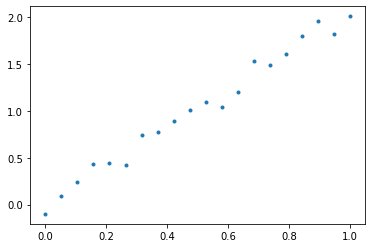

In [2]:
x = np.linspace(0,1,20)
y = x * 2 + np.random.normal(0, 0.1,20)
# 기울기가 2인 직선에 오차추가
plt.plot(x,y,'.')

이제 이 데이터의 오차를 최소화하는 w 를 회귀분석 라이브러리 없이 찾아보자. 

### w 초기값 랜덤 생성 

이를 위해 먼저 아무거나 랜덤한 w 값을 설정해보도록 하겠다. 

In [5]:
w = np.random.random() * 10 
print("init w :",w)#_init)

init w : 9.39819236896717


### 오차값 계산 

각 x 의 오차 d는 다음의 식에 의해서 생성한다. 

```
d = y - x * w 
```
이제 모든 x 에 대해 y 와 오차를 출력해보자. 


In [6]:
for i in range( len(x) ) : 
  d = y[i] - x[i] * w 
  print(y[i] - x[i] * w)

-0.10036650235001493
-0.39878310461545097
-0.7523227777802253
-1.052210026810187
-1.5303639666277182
-2.0557760222240598
-2.226354364691266
-2.683048127766004
-3.068706471655164
-3.4390233032338298
-3.845014234081349
-4.398466805323563
-4.73443829586765
-4.890408618022205
-5.428688017794753
-5.80828924599078
-6.117130454387638
-6.449674162721758
-7.081547205986217
-7.384914161805147


### 크면 작게 작으면 크게 

이제 아주 단순한 방법으로 w 를 변경해보도록 하겠다. 
```
d 가 0보다 크면 w 값을 키우고 0보다 작으면 w를 줄인다. 
```
이때 변화량은 일단 0.1로 고정하고 프로그램을 작성해보도록 한다. 



In [10]:
for i in range( len(x) ) : 
  d = y[i] - x[i] * w 
  if d > 0 : 
    w = w + 0.1
  else:
    w = w - 0.1  
  print(w)

1.8981923689671865
1.9981923689671865
1.8981923689671865
1.7981923689671864
1.6981923689671863
1.7981923689671864
1.6981923689671863
1.7981923689671864
1.8981923689671865
1.9981923689671865
1.8981923689671865
1.9981923689671865
1.8981923689671865
1.9981923689671865
2.0981923689671866
1.9981923689671865
1.8981923689671865
1.9981923689671865
2.0981923689671866
1.9981923689671865


In [21]:
#if else 없이 
w = np.random.random() * 10

x = np.linspace(0,0.1,20)
y = x * 0.2 + np.random.normal(0,0.1,20)

for n in range(10):
  for i in range(len(x)):
    d = y[i] - x[i] * w

    w = w + d * 0.1

print(w) 

2.873841124281333


[0.09151412562001329, 0.3219628327785173, 0.4264528628177126, 0.7577108747693224, 0.7777423096502867, 1.1731350437449757, 1.2825108763017914, 1.6777976360977713, 1.9609268509304767, 1.9916751345884118, 2.0612916389771714, 2.3020435640087005, 2.4375472772903723, 2.605885481060506, 2.6561884890097254, 2.964247836814553, 2.812473951567374, 3.2725090432493413, 3.004510112428983, 2.9671269844366543, 0.09151412562001329, 0.21669967488378042, 0.21592654702823885, 0.4419214010851118, 0.3566896780713391, 0.6468192542712913, 0.6509319289333699, 0.940955530834613, 1.1188215877725813, 1.0443067135357795, 1.0086600600298024, 1.1441488271665945, 1.1743893825535294, 1.2374644284289258, 1.1825042784834086, 1.385300468393499, 1.1282634252515833, 1.483035359038814, 1.1097732703237182, 0.967126984436653, 0.09151412562001329, 0.1114365169890435, 0.005400231238765096, 0.12613192740090118, -0.06436295350760823, 0.17313504374497546, 0.08251087630179099, 0.2777976360977712, 0.3609268509304766, 0.1916751345884

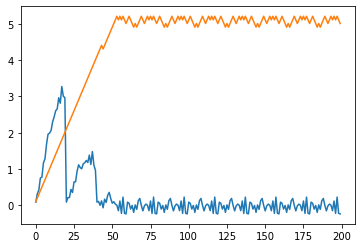

In [17]:
w = np.random.random() * 10 #weight값 초기화해줌
x = np.linspace(0,1,20)
y = x * 5 + np.random.normal(0,0.1,20) #x * 5000, x * 2, 0.1이 딱맞을수없으므로 항상 진동할수밖에없다
ds, ws = [],[] #ds = []

for n in range(10):
  for i in range(len(x)):
    d = y[i] - x[i] * w
    ds = ds + [d] # ds += [d]

    if d > 0 :
      w = w + 0.1 # d의 변화량 추가 : w = w + d * 0.1, 5000일때 w = w + 2 or w = w + d * 0.1
    else:
      w = w - 0.1 # d의 변화량 추가 : w = w - d * 0.1, 5000일때 w = w - 2 or w = w - d * 0.1
    ws += [w] #추가

print(ds) #값이 200개나온다 

plt.plot(ds)
plt.plot(ws) #추가 
#아래 d에 비례해서 적용하는방법을 하면 훨씬 부드러워진다 


#### <font color = 'chocolate'>실습: d 의 변화량을 그려보기 
w를 초기화하고 이 코드를 n 회 반복해서 실행해 w가 기울기에 가까워져가는 과정을 도식화해보자. 
</font>

In [ ]:
w = np.random.random() * 10 

#실습 코드를 작성해보세요




### d에 비례해서 적용

위의 방식은 수렴의 속도가 일정하며 후반에 0.1을 기준으로 진동이 발생할 확률이 높다.  하지만 오차가 크면 변화량을 늘이는 방법은 어떨까?  이제 다음의 방법을 적용해 보도록 하겠다. 

```
    d = y - x * w  
    w += d * 0.1 
```

이제 이것을 모든 x[i], y[i] 에 대해 처리하는 것을 10번 반복한 후에 w 값을 보도록하자. 

In [16]:
w = np.random.random() * 10 

ws, ds = [],[]
for step in range(10):
    for i in range(len(x)) :
        d = (y[i] - x[i] * w)               
        w += d * 0.1

print(w)

2.0022813477435144


2.002173543812951


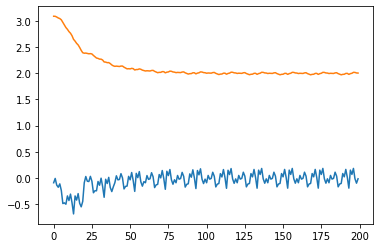

In [12]:
# 오차는 비슷하나, weight값이 훨씬 안정화 된것을 볼수있다
w = np.random.random() * 10

ws, ds = [],[]
for step in range(10):
  for i in range(len(x)):
    d = (y[i] - x[i] * w)
    ds += [d]
    w += d * 0.1
    ws += [w]

print(w)
plt.plot(ds)
plt.plot(ws)
plt.show()

w 가 원래 설정한 계수에 근접한 것을 볼 수 있을것이다. 이렇게 오차량에 비례하여 변화량을 조절함으로서 우리가 원하는 수치에 근접해가는 것을 알 수 있댜.



#### <font color = 'chocolate'>실습: d 의 변화량을 그려보기 2
이번에도 w를 초기화하고 w와 d 의 변화를 그래프로 그린 후에 고정 변화량과 비례 변화량의 수렴속도를 비교해보자. 
</font>

In [15]:
w = np.random.random() * 10 
# 실습의 코드를 작성하세요


### d 의 합산 값으로 수렴

d에 비례해 변화량을 정하는 방식은 고정 변화량에 비해 더 안정적이고 빠르다. 하지만  개별 데이터에 대해 이를 처리하기 때문에 완전한 수렴이 안되며 후반에 진동이 발생한다.

사실 회귀분석은 전체 데이터 x 에 대해 최소값을 구하는 것이므로 이번에는 전체 데이터에 대한 오차값을 구하는 방법이 더 효율적이다. 단 전체 d 의 합산값에 대해 처리하므로 이번엔 계수를 0.01로 맞춰주도록 하겠다. 


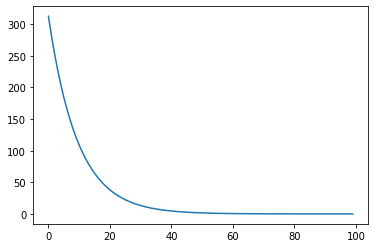

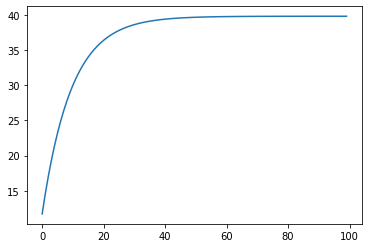

39.8241573740804


In [24]:
x = np.linspace(0,1,20)
y = x * 40 + np.random.normal(0,1,20)
w = np.random.random() * 10 
ds,ws  = [],[]

for step in range(100): #700  
  d = 0
  for i in range(len(x)) :
    d += (y[i] - x[i] * w) #각각 d에 대해 업데이트하는것이 아니라 한꺼번에 업데이트 

  w += d * 0.01
  ds = ds + [d]
  ws = ws + [w]

plt.plot(ds)
plt.show()
plt.plot(ws)
plt.show()
print(w)
#점점가까워짐

상당히 깔끔하게 그려진 것을 볼 수 있다. 그런데 
```
d = 0
for i in range(len(x)) :
  d += (y[i] - x[i] * w) 
```

이 코드는 다음과 같이 더 간단히 할 수 있다. 

```
d = np.sum(y - x * w)
```

이제 위의 코드를 간략화시켜 완성시켜본다. 



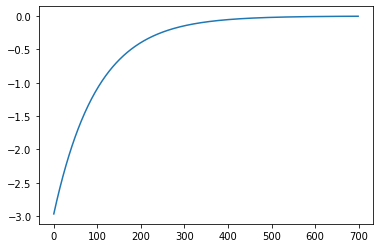

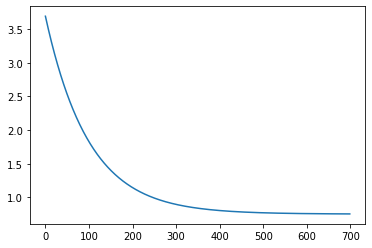

0.7553568575579845


In [22]:
w = np.random.random() * 10 
ds,ws  = [],[]
for step in range(700):   
  d = np.sum(y - x * w) #20개의 값을 sum으로 합산 
  w += d * 0.01
  ds = ds + [d]
  ws = ws + [w]

plt.plot(ds)
plt.show()
plt.plot(ws)
plt.show()

print(w)

<br><br><br>

<hr>

## 다중 회귀분석 해보기 

이번에는 두개의 입력값 x1, x2 에 대해 다음과 같은 공식으로 생성된 x,y 를 상정해 보겠다. 
```
y =  x1 * 2 + x2 * -4
```
이제 이 데이터를 회귀분석 하는 방법에 대해 생각해보도록 하겠다.  



### 다중 회귀 데이터 만들기 

우선 weight 는 2개가 필요하며 -10~10 사이의 값으로 생성한다. 
```
w = np.random.random(2) * 20 - 10
```
x1, x2 도 만들어주도록 하겠다.  이번에는 x1, x2 는 순차적인 값이 아닌 0~1 사이의 랜덤값으로 생성한다. 
```
x = np.random.random((n,2))
```




#### <font color = 'chocolate'>실습: y 값을 만들기 
위의 x (x1, x2) 에 대해 y = x1 * 2 + x2 * -4 인 y 값을 만들되 위와 마찬가지로  표준편차 0.1 의 오차를 지니도록 생성해보자. 
</font>

In [30]:
n = 20 # 데이터 갯수
w = np.random.random(2) * 20 - 10
x = np.random.random((n,2))
# y값을 직접 만들어보세요 
print(x)
# x는 2개씩 20개
# y는 2와 -4가 곱해진 20개?
y = np.sum(x * np.array([2,-4]), axis=1)
print(y)

[[0.77945181 0.86002679]
 [0.99497953 0.2274789 ]
 [0.74947579 0.05742504]
 [0.70384439 0.79042862]
 [0.58102512 0.66498417]
 [0.86683163 0.65465995]
 [0.12368937 0.92355011]
 [0.63830494 0.95274293]
 [0.41356243 0.22061464]
 [0.52757558 0.03245022]
 [0.5675572  0.90431113]
 [0.75262929 0.16456648]
 [0.98621907 0.30410509]
 [0.58299157 0.71195167]
 [0.24941276 0.96612819]
 [0.88728514 0.98895745]
 [0.47172125 0.72839708]
 [0.64823172 0.71101709]
 [0.00828216 0.01415921]
 [0.72527282 0.4110545 ]]
[-1.88120354  1.08004343  1.26925142 -1.7540257  -1.49788643 -0.88497652
 -3.44682172 -2.53436184 -0.0553337   0.92535029 -2.48213011  0.84699266
  0.75601777 -1.68182354 -3.36568725 -2.18125951 -1.9701458  -1.5476049
 -0.04007254 -0.19367238]


In [27]:
a = np.array([[1,2],[3,4]])
b = np.array([2,-4])
print(a*b)
print(np.sum(a*b,axis=1))

[[  2  -8]
 [  6 -16]]
[ -6 -10]


### 단순회귀처럼 다중회귀 적용

이제 위의 단순회귀분석처럼 다중 회귀 분석 코드를 작성해보자. 이번에는 다시 개별 x[i] 에 대해 오차를 구하고 w 값에 변화를 주도록 하자. 
```
for i in range(len(x)):
  d = y[i] - np.sum( x[i] * w )  
```


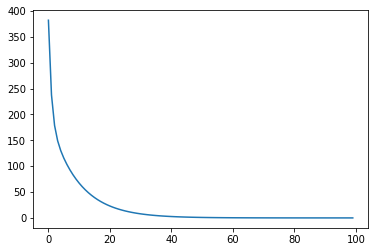

[  1.01096083 999.9902132 ] 0.0047837389936375985


In [35]:
n = 20 # 데이터 갯수
x = np.random.random((n,2))
y = np.sum(x * np.array([1,1000]), axis=1)
w = np.random.random(2) * 20 - 10 # 0부터 20,weight 10까지
ds,ws  = [],[]
for step in range(100): #20   
  for i in range(len(x)): #각각 x가 20개이므로 2000개정도 돌겠군 
    d = y[i] - np.sum( x[i] * w ) 
    w += d * x[i] * 0.1  # w += d * 0.1
  ds = ds + [np.abs(d)]
  ws = ws + [w]

plt.plot(ds)
plt.show()
print(w,d)
# x1이 만약 1이고 x2가 4라면 두개에 의해 오차d가 4가 되었을때 이 오차의 범위는 누구냐를 찾는것
# x1 1이므로 오차에 대해 1만큼기여를 했고 x2는 3만큼 기여를 했다고 본다
# x1이 0이라면 기여가 0일텐데 어떻게 표현할것인가
# 오차에 x1을 곱하고 x2를 곱하여 오차를 적용시킨다 
# 이것을 수식으로하면 w += d * 0.1 * x[i]
# 만약 w[2,4] x[2,1]->d 0.7 ===>  1.4 * 0.1 과  0.7*0.1 을 w로
# w로 각각 조정이 될까?

아마 그래프가 수렴하지만 0에 수렴하지는 안을 것이다. 이는 두 w 값이 동시에 같은 변경값을 같기 때문에 각각의 수렴을 거치지 못하면서 생기는 문제이다. 요컨데 단순히 오차값을 통해 같은 변경값을 w1, w2 에 적용시키는 것으로는 문제가 해결되지 안는다. 




### 오차를 분배하기 

두개 이상의 입력값과 그 입력값들의 계수 w에 의해 발생한 오차값을 이용해 각각의 w 를 수렴시킬 수 있을까?  그 문제에 대한 답은 

```
오차값을 x 의 크기에 따라 분배한다 
```
이다.  요컨데 x1,x2 = 0.1,1 에 의해 오차가 3 이 발생했다면 w1 은 오차값에 다시 x1 의 값인 0.1 을 곱해주고 w2 는 x2 인 1 을 곱해서 적용시켜주는 것이다. 요컨데 
```
오차값에 기여도를 입력 값으로부터 부여
```
의 원리이다.  이것을 코드에 적용하면 다음과 같다. 

```
w += d * 0.1  
=> 
w += d * 0.1 * x[i]
```

이제 이것을 적용하여 코드를 돌려보고 그 결과를 보도록하자 


In [ ]:
w = np.random.random(2) * 20 - 10
ds,ws  = [],[]
for step in range(100):   
  for i in range(len(x)):
    d = y[i] - np.sum( x[i] * w )  
    w += d * x[i] * 0.1  
  ds = ds + [np.abs(d)]
  ws = ws + [w]

plt.plot(ds)
plt.show()
print(w,d)

이제 실제로 우리가 처음 적용한 계수 2와 -4 에 근접해가는 것을 볼 수 있을 것이다.  이것이 여러개의 입력 값에 해당하는 계수를 맞춰가는 원리이며 신경망이 많은 입력 값이 특정 출력값에 수렴하도록 계숙값을 변화시켜가는 근본원리이다. 



### 행렬연산으로 변경하기 

그렇다면 이이 분배방식은 반드시 개별 x 에 대해 연산이 이뤄져야 하는가?  그렇지 안다.  x 와 오차값을 다시 한번 출력해보도록하자. 

In [ ]:
for i in range(len(x)):
  d = y[i] - np.sum( x[i] * w )  

이것은 다음의 연산으로 한번에 배열로 바꿀 수 있다. 

In [ ]:
d = y - np.sum( x * w , axis = 1 )
print(d)
# y20개에서 예측값y를 빼서 d가 20개 나온다 이것이 행렬연산?
# 이 d가 x값에의해 분배되길 원하므로 d20결과(20*1,일렬)에 x20(2,20)곱한다
# dx 는 2*20 
# dx를 w2개에 열기준 추가해준다 
# w에 총 0열 20개 1열 20개

여기에 x 값을 곱하면 어떨까?  하지만 x 는 n * 2 의 행렬이고 d 는 n 행렬이므로 둘을 곱하기 위해선 n * 1 행렬로 바꿔줘야한다. 

In [ ]:
print( d.reshape(-1,1) * x)

이 값은 각각 w1, w2 에 적용되는 비율이다. 그리고 이들을 세로축(axis=0) 으로 합산하면 w1, w2 에 적용되야 하는 변경값들이 합산된다. 

In [ ]:
print( np.sum( d.reshape(-1,1) * x, axis = 0 ) )


이들은 전체 변경값의 합산값이므로 0.01 의 변경률을 적용시키도록 하겠다. 

In [ ]:
w += np.sum( d.reshape(-1,1) * x, axis = 0 ) * 0.01
print(w)

#### <font color = 'chocolate'>실습: 다중 회귀 간략화하기
위의 코드를 적용해 다중회귀를 numpy 연산을 통해 전체 변경값을 한번에 구해 처리할 수 있도록 간략화하세요. 또한 그래프로 d 의 변화를 출력할 수 있는 방법을 찾으세요
</font>




In [ ]:
w = np.random.random(2) * 20 - 10
ds,ws  = [],[]
for step in range(100): 

  # 아래의 코드를 간략화시키고 d 값의 그래프를 그릴 수 있도록 변경하세요  
  '''
  for i in range(len(x)):
    d = y[i] - np.sum( x[i] * w )  
    w += d * x[i] * 0.1  
  ds = ds + [np.abs(d)]
  '''

  ws = ws + [w]

plt.plot(ds)
plt.show()
print(w,d)

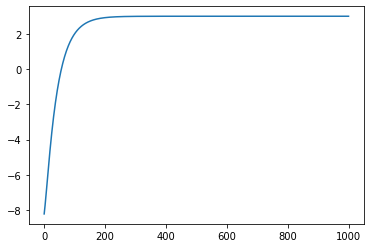

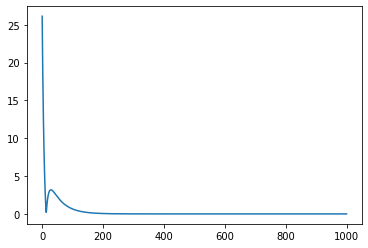

[ 3. -5.]


In [44]:
n = 20 # 데이터 갯수
x = np.random.random((n,2))
y = np.sum(x * np.array([3,-5]), axis=1)
w = np.random.random(2) * 20 - 10
ds,ws  = [],[]


for step in range(1000):
  d = y - np.sum(x * w, axis=1) #x1*w1, x2*w2 
  # print(d.reshape(-1,1)) 
  # print(x) #2열 종대
  dx = d.reshape(-1,1) * x
  # print(dx) # 2열종대결과 
  w += np.sum(dx,axis=0) * 0.01 #오차 그대로 주면안됨, 계수를 줘야하는데 0.1은 너무크다 
  ds += [abs(np.sum(d))]
  ws += [w[0]]

plt.plot(ws)
plt.show()
plt.plot(ds)
plt.show()

print(w)
# 한 전체의 x에 대해서 모든 오차에 대해 한번에 업데이트 해주는 방식 

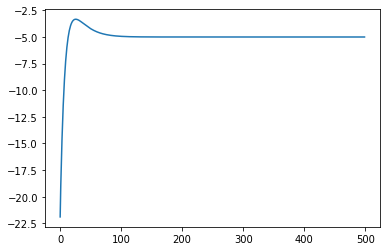

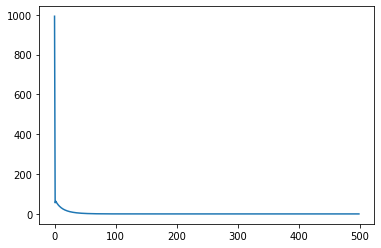

[   3.   -5. -152.   14.]


In [61]:
#입력값이 4개 계수도 4개, 입력값(데이터값)이 늘어났을때 수렴시간 체크

n = 20 # 데이터 갯수
x = np.random.random((n,4))
y = np.sum(x * np.array([3, -5, -152, 14]), axis=1)
w = np.random.random(4) * 20 - 10
ds,ws  = [],[]


for step in range(500):
  d = y - np.sum(x * w, axis=1) #x1*w1, x2*w2 
  dx = d.reshape(-1,1) * x
  w += np.sum(dx,axis=0) * 0.05 #오차 그대로 주면안됨, 계수를 줘야하는데 0.1은 너무크다 
  ds += [abs(np.sum(d))]
  ws += [w[1]]

plt.plot(ws)
plt.show()
plt.plot(ds)
plt.show()

print(w)

<br><br><br>

<hr> 

## 분류와 Sigmoid 함수

이번에는 분류문제를 해결해보자. 분류문제중에 가장 간단한 or 문제를 먼저 생각해보자. 무척 간단하다고 생각할 지도 모르겠다.  위에서 직선의 연관성을 도출한 것에 비하면 이것이 훨씬 쉽게 느껴질 수도 있다. 먼저 데이터를 만들어보자. 


In [ ]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,1])

이제 위에서 사용한 알고리즘을 돌려보도록 하자. 

In [ ]:
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(100):         
    d = y - np.sum(x * w, axis = 1)    
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())        
print("result:", np.dot(x,w), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()


우리가 원하는 답은 0,1,1,1 이지만 알고리즘의 출력은 0,0.6, 0.6 1.3  정도가 나올 것이다.  왜 이런 문제가 생길까? 

정답은 0,1 에도 1을  만들고 1,0 에도 1을 만들지만 1,1 에도 1을 만드는 방법은 없다는 것이다. 왜냐하면 우리가 사용하는 방법은 단순히 입력에 가중치를 더해서 합산하는 방법에 지나지 않기 때문이다.  이런 방식은 실수값을 예측하는 회귀문제에는 잘 맞지만 범주형 데이터를 다루는 분류문제에는 적합하지 안다. 

이런 문제를 해결하기 위해서는 어떤 현상이 발생하는 확률을 계산하기 위한 함수인 sigmoid 함수가 적합하다. 이 함수의 정의는 다음과 같다. 



In [ ]:
def sig(x):
    return 1 / ( 1 + np.exp(-x) )

이 함수는 결과적으로 다음과 같은 형태를 띄며 결국 모든 값을 0 ~ 1 사이로 만들어 버린다. 그리고 경계를 기점으로 기울기가 양쪽으로 다 0 에 수렴한다.  결국 이 함수를 이용하면 0과 1 같은 상태를 표현하는데 적합하다. 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.linspace(-10,10,100)
y = sig(x)
plt.plot(x,y)
plt.show() 

이제 이 함수를 사용해 위의 예제를 풀어보도록 하겠다. 이번에는 좀더 많은 시행을 시켜보자. 

In [ ]:
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(1000):         
    o = sig(np.sum(x * w, axis = 1) ) 
    d = y - o 
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())        
print("result:", sig( np.dot(x,w) ), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()



이제 3가지 결과값은 상당히 1에 근접한 것을 볼 수 있다. 또한 학습또한 1을 넘김으로서 발생하는 오차에 구애받지 않고 가중치를 증가시켰음을 알 수 있다. 하지만 0,0 의 값이 0.5 가 나온 것에 대한 불만이 있을 것이다. 이것은 위의 sigmoid 함수가 -무한대 부터 +무한대 까지의 범위를 받는 함수이기에 발생하는 문제이다. 

이것은 sig 함수를 다음과 같이 변경해서 해결이 가능하다. 


In [ ]:
def sig(x):
    return 1 / ( 1 + np.exp(x * -10 + 5) )
x = np.linspace(0,1,100)
y = sig(x)
plt.plot(x,y)
plt.show() 

비슷하게 느껴질 수도 있지만 위의 sigmoid 함수는 0~1 까지의  값의 변화에 대응하여 0과 1에 수렴하도록 변경한 것이다. 이제 이를 이용하여  위의 예제를 다시 돌려보자. 

In [ ]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,1])
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(1000):         
    o = sig(np.sum(x * w, axis = 1) ) 
    d = y - o 
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())        
print("result:", sig( np.dot(x,w) ), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()


이제 값들이 상당히 근접한 것을 알 수 있다.  

이번에는 위의 예를 and 로 변환해서 풀어보자. 


In [ ]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,0,0,1])
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(1000):         
    o = sig(np.sum(x * w, axis = 1) ) 
    d = y - o 
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())        
print("result:", sig( np.dot(x,w) ), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()


생각보다 결과가 좋지 안음에 갸웃할 것이다. 사실 가만히 생각해봐도 and 는 or 에 비해 훨씬 더 정교한 문제이다. 그런 문제를 다룰때 위에서 우리가 다룬 x 를 기반 오차를 결정하는 방법은 이처럼 x 가 0이나 1에 고정되는 방식일 경우 그 한계가 드러난다. 오차가 발생하는 범인은 x 만이 아니기에 우리는 여기서 w도 그 원인의 하나로 그 오차율에 영향을 고려해야 한다. 

이제 w의 변경치인 wd 공식을 다음과 같이 변경하도록 하겠다. 

$$ \large wd = w * x * d $$

이는 weight 와 x 의 연산이 필요하므로 다음과 같은 공식을 거친다. 


#### and gate 해결법

In [ ]:


x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,0,0,1])
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(10000):         
    o = sig( np.sum(x * w, axis = 1))
    d = y - o
    wd =  np.sum( (x * w).T * d , axis = 1) 
    w += wd     
    ds = np.append(ds,np.abs(d).sum())      
print("result:", sig( np.dot(x,w) ).round(4), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()

## xor 문제와 다층 신경망 

위에서 우리가 다룬 것은 초기 학자들이 연구하던 단층 신경망의 예이다. 당시에는 이러한 분류에 대한 수학적인 방법론들이 정립되지 안았기 때문에 이런 단층 신경망으로 문제를 해결하는 것도 놀랍게 느껴졌지만 결국 이러한 신경망은  

$$ y = w1x1 + w2x2 + ..  $$

의 구조를 지니며 이것은 1차원이든 2차원이든 3차원이든 직선이나 평면에 의한 문제의 분류밖에 해결하지 못한다는 것이 증명되고 그 한계로 XOR 문제가 제시되었다. 

XOR 문제는 간단한다. 

0,0 -> 0
0,1 -> 1
1,0 -> 1
1,1 -> 0 

이 되며 이는 결과적으로 평면상에 다음과 같은 형태로 표현된다. 




In [ ]:
plt.scatter([0,0,1,1],[0,1,0,1], c=[0,1,1,0])

이 문제를 해결하기 위해 나온 이론이 입력과  출력사이에 중간레이어를 두는 방법이다.  지금까지 우리가 다뤘던 신경망이 다음과 같은 구조라면 

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory&fname=http%3A%2F%2Fcfile10.uf.tistory.com%2Fimage%2F261AC64E56C2D0E7241637" 
    width = 400
    style = "float:left"     
    title = "출처: https://untitledtblog.tistory.com/27" > 
    



다층 신경망은 다음과 같은 구조를 지닌다. 단, 아래에는 은닉층이 하나인 경우에 대한 예시일 뿐이지만 은닉층은 얼마든지 여러층으로 만들 수 있다. 

<img src = "https://mblogthumb-phinf.pstatic.net/MjAxNzA2MTZfMzQg/MDAxNDk3NTc4MDc4NTU4.C0svtndk_igat9FquGev3il4HWs2mEKarZPuzI0kgMcg.75f89hjNck6eLQNZWQ4-QZiWNnArNKnuEXvxoL3n0aAg.PNG.samsjang/%EC%BA%A1%EC%B2%98.PNG?type=w2" 
    width = 600
    style = "float:left"     
    title = "출처: https://m.blog.naver.com/samsjang/221030487369" > 



이와 같은 간단한 발상을 왜 못했을까? 하는 생각이 들 것이다. 하지만 오류를 최소화하는 1차원적인 발상으로는 저 은닉층을 거치는 weight 값을 어떻게 처리해야 할지 당시에는 몰랐다.  그리고 이 문제를 해결한 것이 '오류역전파 모델' 이다. 

### 오류 역전파 모델 


위의 예제에서 우리는 오류에 대한 책임을 죄다 w 에 돌려버렸다. 당연한것이 입력인 x는 고정되어있기 때문에 우리가 수정 가능한 것은  w 밖에 없었기 때문이다. 하지만 역전파 모델에서는 그 입력의에도 책임을 돌린다.그래야 은닉층의 오류를 기반으로 다시 그 이전계층의 가중치 w 에 대한 수정이 가해지기 때문이다. 

위의 그림을 기준으로 입력을 i ,은닉을 h, 출력을 o 라고 할 경우 신경망이 결과를 도출하는 과정은  i -> h -> o 의 형태로 이뤄지지만 망에 대한 수정은 o -> h -> i 방향으로 진행된다. 이것은 여러개의 은닉층을 가진 경우에도 마찬가지로 역으로  진행되기에 '역전파 모델' 이라고 불리우며 현재까지 모든 신경망 학습의 기본원리이다. 


역전파 과정을 좀더 자세히 표현하면 

- 출력층의 에러 d_out 을 구한다. 
- d_out 을 기반으로 w_h2o 를 업데이트한다. 
- 은닉층의 에러 d_hidden 을 구한다. 
- d_hidden 을 기반으로 w_i2h 를 업데이트한다. 

이것의 수학적 모델은 매우 심플하다. w 는 w 가 오류에 얼마나 어떤 방향으로 영향을 주었는가를 기준으로 그 수치를 업데이트 하고 은닉층은 은닉층의 값이 얼마나 어떤 방향으로 오류에 영향을 주었는가를 계산한다. w 의 오류는 w 값의 변화로서 영향을 주며 은닉층의 오류는 다시 이를 기준으로 그 이전계층의 w 오류를 계산하는데 사용된다. 

다만 좀더 세밀히 접근하면 단순히 값에 영향을 준 사실 보다도 그 x 가 오류에 얼마나 큰 차이를 준 것인지 기울기를 구하여 그 조정양을 조절하게 되는데 이때 미분이 사용된다. 하지만 이 부분은 지금은 무시하고 영향력을 중심으로 생각해도 좋다. 



이제 이를 기반으로 xor 문제를 풀 수 있도록 다계층 신경망을 생각해보자. 

In [ ]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,0])

일단 은닉층은 하나의 층으로 해보도록 하겠다. 그리고 은닉층의 노드숫자는 hn 으로 정의한다. 그러면 입력->은닉의 가중치들의 숫자는 dm * hn 이 되고 은닉 -> 출력의 가중치의 숫자는 hn 이 된다. 

In [ ]:
n,hn,dm = 4,3,2                 # 데이터 갯수, 히든 노드, 입력 노드수
w1 = np.random.random((hn,dm))  # 은닉층 가중치
w2 = np.random.random(hn)       # 출력층 가중치
print("w1:\n",w1,"\nw2:\n",w2)

이제 이를 이용해 x 의 입력을 y로 전달하는 과정을 만들어보도록 하겠다. 

In [ ]:
h = sig( np.dot( x, w1.T ))
print(h)
o = sig( np.sum( h * w2 , axis = 1) ).round(4)
print(o)

이번엔 이를 통해 업데이트 값을 계산해보자. 위에서 다룬 방식으로 업데이트 값을 계산해보도록 하겠다. sigp 는 sigmoid 함수의 미분함수로 sigp(x) 는 x(1-x) 이다. 이 부분까지 고려하면 너무 복잡하니 그냥 x 라고 생각하는게 더 편할듯하다. 

In [ ]:
d = d = (y - o)*sigp(o)
wd2 = h.T.dot( d ) * lr

print(wd2)
w2 += wd2

이제 hidden 의 오차를 계산해보자. 은닉층의 오차는 출력 가중치와 출력오차의 곱이 되며 여기에 x 를 반영해주면 은닉계층의 가중치의 변동값이 나온다. 

In [ ]:
hd = d.reshape(-1,1).dot(w2.reshape(-1,1).T)
print(hd)
wd1 = x.T.dot(hd) 
print(wd1)
w1 += wd1 * lr

그런데 여기에 한가지 빼먹은게 있다. 실제 학습에서는 곱 연산만으로는 모든 값의 범위를 대응하기 어렵기 때문에 이런 문제를 쉽게 해결하기 위해 각 출력마다 전체적인 범위를 조정하는 bias 라고 하는 값을 지닌다. 이들은 모든 출력에 포함되며 역전파시에도 직접적으로 조정치를 얻는다. 현재 우리가 다루는 네트워크에서는 은닉과 출력 2개의 값에 bias 를 줄 수 있기에 이를 반영하면  정방향처리는 다음과 같이 바꿀 수 있다. 


In [ ]:
b1,b2 = 0

h = sig( np.dot( x, w1.T ) + b1)
o = sig( np.sum( h * w2 , axis = 1) + b2 ).round(4)

또한 바이어스의 업데이트는 바로 직접적인 조정을 받기 때문에 출력층과 은닉층의 바이어스는 다음과 같이 업데이트된다. 


In [ ]:
b2 += d * lr 
b1 += hd * lr 

위의 모든 사항을 반영하여 신경망을 완성하면 다음과 같다. 

In [ ]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,0])
n,hn,dm = 4,2,2
b1,b2 = 0,0
w1 = np.random.random((hn,dm))
w2 = np.random.random(hn)
lr = 0.01

def sigp(x):
    return x  * (1-x)

ds = np.array([])
for step in range(100000):         
    h = sig( np.dot( x, w1.T ) + b1)
    o = sig( np.sum( h * w2 , axis = 1) + b2 ).round(4) 
    d = (y - o)*sigp(o)
    
    
    wd2 = h.T.dot( d ) * lr
    
    hd = d.reshape(-1,1).dot(w2.reshape(-1,1).T)
    wd1 = x.T.dot(hd) 
    
    w2 += wd2 * lr    
    b2 += d * lr    
    w1 += wd1 * lr
    b1 += hd * lr 
    if step % 100 == 0 :
        ds = np.append(ds,np.abs(d).sum())        
    

print("result:", o , "error:",ds[-1].round(4))  
#print(b)
plt.plot(ds)
plt.show()


